### 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols, glm 
from datetime import datetime, date
from dateutil.parser import parse
import matplotlib.pyplot as plt

### 파일 불러오기

In [7]:
demo = pd.read_csv("/Users/anjaeu/Desktop/Contents/롯데 멤버스 공모전/전처리/raw_df/LPOINT_BIG_COMP_01_DEMO.csv")
purchase_info = pd.read_csv("/Users/anjaeu/Desktop/Contents/롯데 멤버스 공모전/전처리/raw_df/LPOINT_BIG_COMP_02_PDDE_상품구매정보.csv")
affiliate_use_info = pd.read_csv("/Users/anjaeu/Desktop/Contents/롯데 멤버스 공모전/전처리/raw_df/LPOINT_BIG_COMP_03_COP_U_제휴사이용정보.csv")
goods_info = pd.read_csv("/Users/anjaeu/Desktop/Contents/롯데 멤버스 공모전/전처리/raw_df/LPOINT_BIG_COMP_04_PD_CLAC_상품분류정보.csv")
store_info = pd.read_csv("/Users/anjaeu/Desktop/Contents/롯데 멤버스 공모전/전처리/raw_df/LPOINT_BIG_COMP_05_BR_점포정보.csv")
Lpay_info = pd.read_csv("/Users/anjaeu/Desktop/Contents/롯데 멤버스 공모전/전처리/raw_df/LPOINT_BIG_COMP_06_LPAY_엘페이이용정보.csv")

/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 데이터 칼럼명 변환

In [8]:
demo = demo.rename(columns= {'cust':'고객번호','ma_fem_dv':'성별','ages':'연령대','zon_hlv':'거주지대분류코드'})
purchase_info = purchase_info.rename(columns = {'cust':'고객번호','rct_no':'영수증번호','chnl_dv':'채널구분','cop_c':'제휴사코드',
                                     'br_c':'제휴사세부코드','pd_c':'상품코드','de_dt':'구매일자','de_hr':'구매시간','buy_am':'구매금액'
                                     ,'buy_ct':'구매수량'})
affiliate_use_info = affiliate_use_info.rename(columns = {'cust':'고객번호','rct_no':'영수증번호','cop_c':'제휴사코드','br_c':'제휴사세부코드',
                                               'chnl_dv':'채널구분','de_dt':'이용일자', 'vst_dt':'방문일자','de_hr':'이용시간',
                                               'buy_am':'이용금액'})
goods_info = goods_info.rename(columns = {'pd_c':'상품코드','pd_nm':'소분류명','clac_hlv_nm':'대분류명','clac_mcls_nm':'중분류명'})
store_info = store_info.rename(columns = {'br_c':'제휴사세부코드','cop_c':'제휴사코드', 'zon_hlv':'점포위치코드','zon_mcls':'점포위치세부코드'})
Lpay_info = Lpay_info.rename(columns = {'cust':'고객번호', 'rct_no':'영수증번호', 'cop_c':'제휴사코드', 'chnl_dv':'채널구분',
                                         'de_dt':'이용일자','de_hr':'이용시간', 'buy_am':'이용금액'})

<AxesSubplot:>

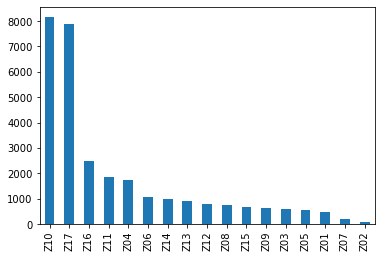

In [18]:
demo.거주지대분류코드.value_counts().plot(kind='bar')

### Z10 = 경기, Z17 = 서울, Z16 = 부산, Z11 = 경남, Z04 = 인천, Z06 = 경북, Z14 = 대구, Z13 = 충남, Z12 = 전북, 
### Z08 = 전남, Z15 = 충북, Z09 = 강원, Z03 = 대전, Z05 = 광주, Z01 = 울산, Z07 = 제주, Z02 = 세종

## 상품 구매데이터 정제

In [19]:
purchase_info

,고객번호,영수증번호,채널구분,제휴사코드,제휴사세부코드,상품코드,구매일자,구매시간,구매금액,구매수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [20]:
store_info

,제휴사세부코드,제휴사코드,점포위치코드,점포위치세부코드
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005
...,...,...,...,...
8803,E010040,E01,Z17,Z17024
8804,E010041,E01,Z16,Z16005
8805,E010042,E01,Z17,Z17021
8806,E010043,E01,Z10,Z10035


In [21]:
purchase_info=purchase_info.sort_values(by="고객번호")
raw_purchase_merge_data = pd.merge(purchase_info,demo,how='left')
raw_purchase_merge_data = pd.merge(raw_purchase_merge_data,goods_info,how='left')
raw_purchase_merge_data = pd.merge(raw_purchase_merge_data,store_info,how='left')
purchase_merge_data = raw_purchase_merge_data

In [22]:
purchase_merge_data.isnull().sum()

고객번호             0
영수증번호            0
채널구분             0
제휴사코드            0
제휴사세부코드     428501
상품코드             0
구매일자             0
구매시간             0
구매금액             0
구매수량             0
성별               0
연령대              0
거주지대분류코드         0
소분류명             0
대분류명             0
중분류명             0
점포위치코드      428501
점포위치세부코드    428501
dtype: int64

In [23]:
del purchase_merge_data['영수증번호']
del purchase_merge_data['소분류명']
del purchase_merge_data['중분류명']
purchase_merge_data['점포위치코드'] = np.where(pd.notnull(purchase_merge_data['점포위치코드']) == True, purchase_merge_data['점포위치코드'], 
                                     purchase_merge_data['거주지대분류코드'])
purchase_merge_data['점포위치세부코드'] = np.where(pd.notnull(purchase_merge_data['점포위치세부코드']) == True, purchase_merge_data['점포위치세부코드'], 
                                     purchase_merge_data['거주지대분류코드'])
purchase_merge_data['제휴사세부코드'] = np.where(pd.notnull(purchase_merge_data['제휴사세부코드']) == True, purchase_merge_data['제휴사세부코드'], 
                                     purchase_merge_data['제휴사코드'])
purchase_merge_data['구매수량당_구매금액'] = purchase_merge_data['구매금액']/purchase_merge_data['구매수량']
purchase_merge_data['연령대'] = purchase_merge_data['연령대'].replace("대", "",regex=True).astype(int)
purchase_merge_data['제휴사코드'] = purchase_merge_data['제휴사코드'].replace("A", "1",regex=True).astype(int)
purchase_merge_data['제휴사세부코드'] = purchase_merge_data['제휴사세부코드'].replace("A", "1",regex=True).astype(int)
purchase_merge_data['상품코드'] = purchase_merge_data['상품코드'].replace("PD", "",regex=True).astype(int)
purchase_merge_data['성별'] = purchase_merge_data['성별'].replace("남성", "0",regex=True).astype(str)
purchase_merge_data['성별'] = purchase_merge_data['성별'].replace("여성", "1",regex=True).astype(str)
purchase_merge_data['성별'] = purchase_merge_data['성별'].astype(int)
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z17", "1",regex=True).astype(str) #서울
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z10", "2",regex=True).astype(str) #경기
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z04", "3",regex=True).astype(str) #인천
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z09", "4",regex=True).astype(str) #강원
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z03", "5",regex=True).astype(str) #대전
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z02", "6",regex=True).astype(str) #세종
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z15", "7",regex=True).astype(str) #충북
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z13", "8",regex=True).astype(str) #충남
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z12", "9",regex=True).astype(str) #전북
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z14", "10",regex=True).astype(str) #대구
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z06", "11",regex=True).astype(str) #경북
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z05", "12",regex=True).astype(str) #광주
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z08", "13",regex=True).astype(str) #전남
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z01", "14",regex=True).astype(str) #울산
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z16", "15",regex=True).astype(str) #부산
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z11", "16",regex=True).astype(str) #경남
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].replace("Z07", "17",regex=True).astype(str) #제주
purchase_merge_data['거주지대분류코드'] = purchase_merge_data['거주지대분류코드'].astype(int)
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z17", "1",regex=True).astype(str) #서울
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z10", "2",regex=True).astype(str) #경기
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z04", "3",regex=True).astype(str) #인천
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z09", "4",regex=True).astype(str) #강원
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z03", "5",regex=True).astype(str) #대전
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z02", "6",regex=True).astype(str) #세종
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z15", "7",regex=True).astype(str) #충북
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z13", "8",regex=True).astype(str) #충남
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z12", "9",regex=True).astype(str) #전북
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z14", "10",regex=True).astype(str) #대구
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z06", "11",regex=True).astype(str) #경북
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z05", "12",regex=True).astype(str) #광주
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z08", "13",regex=True).astype(str) #전남
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z01", "14",regex=True).astype(str) #울산
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z16", "15",regex=True).astype(str) #부산
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z11", "16",regex=True).astype(str) #경남
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].replace("Z07", "17",regex=True).astype(str) #제주
purchase_merge_data['점포위치코드'] = purchase_merge_data['점포위치코드'].astype(int)
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z17", "1",regex=True).astype(str) #서울
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z10", "2",regex=True).astype(str) #경기
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z04", "3",regex=True).astype(str) #인천
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z09", "4",regex=True).astype(str) #강원
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z03", "5",regex=True).astype(str) #대전
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z02", "6",regex=True).astype(str) #세종
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z15", "7",regex=True).astype(str) #충북
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z13", "8",regex=True).astype(str) #충남
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z12", "9",regex=True).astype(str) #전북
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z14", "10",regex=True).astype(str) #대구
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z06", "11",regex=True).astype(str) #경북
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z05", "12",regex=True).astype(str) #광주
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z08", "13",regex=True).astype(str) #전남
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z01", "14",regex=True).astype(str) #울산
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z16", "15",regex=True).astype(str) #부산
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z11", "16",regex=True).astype(str) #경남
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].replace("Z07", "17",regex=True).astype(str) #제주
purchase_merge_data['점포위치세부코드'] = purchase_merge_data['점포위치세부코드'].astype(int)

In [25]:
purchase_merge_data.to_csv('temp_purchase_merge_data.csv')

In [2]:
purchase_merge_data = pd.read_csv('temp_purchase_merge_data.csv')

In [3]:
purchase_merge_data['구매일자_변환'] = purchase_merge_data['구매일자'].apply(str)
purchase_merge_data['구매일자_변환'] = pd.to_datetime(purchase_merge_data['구매일자_변환'])
purchase_merge_data['요일'] = 0
for i in range(len(purchase_merge_data['요일'])) :
    purchase_merge_data['요일'][i] = purchase_merge_data['구매일자_변환'][i].weekday()
del purchase_merge_data['구매일자_변환']

/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_24050/630062913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_merge_data['요일'][i] = purchase_merge_data['구매일자_변환'][i].weekday()


In [4]:
purchase_merge_data['거주_점포일치여부'] = 0
for i in range(len(purchase_merge_data['거주_점포일치여부'])) :
    if purchase_merge_data['거주지대분류코드'][i] ==  purchase_merge_data['점포위치코드'][i]:
        purchase_merge_data['거주_점포일치여부'][i] = 0
    else:
        purchase_merge_data['거주_점포일치여부'][i] = 1

/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_24050/3057354685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_merge_data['거주_점포일치여부'][i] = 0
/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_24050/3057354685.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_merge_data['거주_점포일치여부'][i] = 1


In [5]:
purchase_merge_data.to_csv("purchase_merge_data.csv", index=False)

## 제휴사코드 이용 데이터 정제

In [9]:
affiliate_use_info = affiliate_use_info.sort_values(by="고객번호")
affiliate_merge_info = pd.merge(affiliate_use_info,demo,how='left')
affiliate_merge_info = pd.merge(affiliate_merge_info,store_info,how='left')

In [10]:
affiliate_merge_info

,고객번호,영수증번호,제휴사코드,제휴사세부코드,채널구분,이용일자,방문일자,이용시간,이용금액,성별,연령대,거주지대분류코드,점포위치코드,점포위치세부코드
0,M000034966,21103009D010634285,D01,D011011,1,20211030,20211030,9,3900,여성,40대,Z07,Z17,Z17005
1,M000059535,21030317C012142421,C01,C010085,2,20210303,20210305,17,46000,여성,30대,Z12,Z12,Z12019
2,M000136117,21101414D014818330,D01,D010062,1,20211014,20211014,14,19700,여성,30대,Z11,Z11,Z11013
3,M000136117,21092622D011312100,D01,D011059,1,20210926,20210926,22,15100,여성,30대,Z11,Z11,Z11017
4,M000136117,21032921D014414427,D01,D010062,1,20210329,20210329,21,13200,여성,30대,Z11,Z11,Z11013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M999962961,21041913D015576214,D01,D010692,1,20210419,20210419,13,7300,여성,50대,Z17,Z14,Z14003
248300,M999962961,21070513C022647056,C02,C020002,1,20210705,20210705,13,49000,여성,50대,Z17,Z17,Z17018
248301,M999962961,21061022D013332598,D01,D010692,1,20210610,20210610,22,3900,여성,50대,Z17,Z14,Z14003
248302,M999962961,21090311D024667272,D02,D020392,1,20210903,20210903,11,6000,여성,50대,Z17,Z07,Z07002


In [11]:
del affiliate_merge_info['영수증번호']
affiliate_merge_info['점포위치코드'] = np.where(pd.notnull(affiliate_merge_info['점포위치코드']) == True, affiliate_merge_info['점포위치코드'], 
                                     affiliate_merge_info['거주지대분류코드'])
affiliate_merge_info['점포위치세부코드'] = np.where(pd.notnull(affiliate_merge_info['점포위치세부코드']) == True, affiliate_merge_info['점포위치세부코드'], 
                                     affiliate_merge_info['거주지대분류코드'])
affiliate_merge_info['제휴사세부코드'] = np.where(pd.notnull(affiliate_merge_info['제휴사세부코드']) == True, affiliate_merge_info['제휴사세부코드'], 
                                     affiliate_merge_info['제휴사코드'])
affiliate_merge_info['연령대'] = affiliate_merge_info['연령대'].replace("대", "",regex=True).astype(int)
affiliate_merge_info['제휴사코드'] = affiliate_merge_info['제휴사코드'].replace("B", "2",regex=True).astype(str)
affiliate_merge_info['제휴사코드'] = affiliate_merge_info['제휴사코드'].replace("C", "3",regex=True).astype(str)
affiliate_merge_info['제휴사코드'] = affiliate_merge_info['제휴사코드'].replace("D", "4",regex=True).astype(str)
affiliate_merge_info['제휴사코드'] = affiliate_merge_info['제휴사코드'].replace("E", "5",regex=True).astype(str)
affiliate_merge_info['제휴사코드'] = affiliate_merge_info['제휴사코드'].astype(int)
affiliate_merge_info['제휴사세부코드'] = affiliate_merge_info['제휴사세부코드'].replace("B", "2",regex=True).astype(str)
affiliate_merge_info['제휴사세부코드'] = affiliate_merge_info['제휴사세부코드'].replace("C", "3",regex=True).astype(str)
affiliate_merge_info['제휴사세부코드'] = affiliate_merge_info['제휴사세부코드'].replace("D", "4",regex=True).astype(str)
affiliate_merge_info['제휴사세부코드'] = affiliate_merge_info['제휴사세부코드'].replace("E", "5",regex=True).astype(str)
affiliate_merge_info['제휴사세부코드'] = affiliate_merge_info['제휴사세부코드'].astype(int)
affiliate_merge_info['성별'] = affiliate_merge_info['성별'].replace("남성", "0",regex=True).astype(str)
affiliate_merge_info['성별'] = affiliate_merge_info['성별'].replace("여성", "1",regex=True).astype(str)
affiliate_merge_info['성별'] = affiliate_merge_info['성별'].astype(int)
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z17", "1",regex=True).astype(str) #서울
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z10", "2",regex=True).astype(str) #경기
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z04", "3",regex=True).astype(str) #인천
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z09", "4",regex=True).astype(str) #강원
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z03", "5",regex=True).astype(str) #대전
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z02", "6",regex=True).astype(str) #세종
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z15", "7",regex=True).astype(str) #충북
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z13", "8",regex=True).astype(str) #충남
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z12", "9",regex=True).astype(str) #전북
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z14", "10",regex=True).astype(str) #대구
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z06", "11",regex=True).astype(str) #경북
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z05", "12",regex=True).astype(str) #광주
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z08", "13",regex=True).astype(str) #전남
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z01", "14",regex=True).astype(str) #울산
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z16", "15",regex=True).astype(str) #부산
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z11", "16",regex=True).astype(str) #경남
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].replace("Z07", "17",regex=True).astype(str) #제주
affiliate_merge_info['거주지대분류코드'] = affiliate_merge_info['거주지대분류코드'].astype(int)
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z17", "1",regex=True).astype(str) #서울
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z10", "2",regex=True).astype(str) #경기
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z04", "3",regex=True).astype(str) #인천
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z09", "4",regex=True).astype(str) #강원
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z03", "5",regex=True).astype(str) #대전
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z02", "6",regex=True).astype(str) #세종
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z15", "7",regex=True).astype(str) #충북
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z13", "8",regex=True).astype(str) #충남
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z12", "9",regex=True).astype(str) #전북
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z14", "10",regex=True).astype(str) #대구
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z06", "11",regex=True).astype(str) #경북
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z05", "12",regex=True).astype(str) #광주
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z08", "13",regex=True).astype(str) #전남
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z01", "14",regex=True).astype(str) #울산
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z16", "15",regex=True).astype(str) #부산
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z11", "16",regex=True).astype(str) #경남
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].replace("Z07", "17",regex=True).astype(str) #제주
affiliate_merge_info['점포위치코드'] = affiliate_merge_info['점포위치코드'].astype(int)
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z17", "1",regex=True).astype(str) #서울
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z10", "2",regex=True).astype(str) #경기
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z04", "3",regex=True).astype(str) #인천
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z09", "4",regex=True).astype(str) #강원
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z03", "5",regex=True).astype(str) #대전
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z02", "6",regex=True).astype(str) #세종
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z15", "7",regex=True).astype(str) #충북
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z13", "8",regex=True).astype(str) #충남
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z12", "9",regex=True).astype(str) #전북
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z14", "10",regex=True).astype(str) #대구
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z06", "11",regex=True).astype(str) #경북
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z05", "12",regex=True).astype(str) #광주
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z08", "13",regex=True).astype(str) #전남
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z01", "14",regex=True).astype(str) #울산
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z16", "15",regex=True).astype(str) #부산
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z11", "16",regex=True).astype(str) #경남
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].replace("Z07", "17",regex=True).astype(str) #제주
affiliate_merge_info['점포위치세부코드'] = affiliate_merge_info['점포위치세부코드'].astype(int)

In [12]:
affiliate_merge_info['이용_방문일치여부'] = 0
for i in range(len(affiliate_merge_info['이용_방문일치여부'])) :
    if affiliate_merge_info['이용일자'][i] ==  affiliate_merge_info['방문일자'][i]:
        affiliate_merge_info['이용_방문일치여부'][i] = 0
    else:
        affiliate_merge_info['이용_방문일치여부'][i] = 1

/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_24050/2468990623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affiliate_merge_info['이용_방문일치여부'][i] = 0
/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_24050/2468990623.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affiliate_merge_info['이용_방문일치여부'][i] = 1


In [13]:
affiliate_merge_info['이용일자_변환'] = affiliate_merge_info['이용일자'].apply(str)
affiliate_merge_info['이용일자_변환'] = pd.to_datetime(affiliate_merge_info['이용일자_변환'])
affiliate_merge_info['요일'] = 0
for i in range(len(affiliate_merge_info['요일'])) :
    affiliate_merge_info['요일'][i] = affiliate_merge_info['이용일자_변환'][i].weekday()
del affiliate_merge_info['이용일자_변환']

/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_24050/76233335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affiliate_merge_info['요일'][i] = affiliate_merge_info['이용일자_변환'][i].weekday()


In [14]:
affiliate_merge_info['거주_점포일치여부'] = 0
for i in range(len(affiliate_merge_info['거주_점포일치여부'])) :
    if affiliate_merge_info['거주지대분류코드'][i] ==  affiliate_merge_info['점포위치코드'][i]:
        affiliate_merge_info['거주_점포일치여부'][i] = 0
    else:
        affiliate_merge_info['거주_점포일치여부'][i] = 1

/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_24050/132850192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affiliate_merge_info['거주_점포일치여부'][i] = 1
/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_24050/132850192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affiliate_merge_info['거주_점포일치여부'][i] = 0


In [15]:
affiliate_merge_info.to_csv("affiliate_merge_data.csv", index=False)

## Lpay 이용 데이터 정제

In [16]:
Lpay_info = Lpay_info.sort_values(by="고객번호")
Lpay_merge_info = pd.merge(Lpay_info,demo,how='left')
Lpay_merge_info

,고객번호,영수증번호,제휴사코드,채널구분,이용일자,이용시간,이용금액,성별,연령대,거주지대분류코드
0,M000136117,210109140124587,A01,1,20210109,14,902500,여성,30대,Z11
1,M000136117,211120000687692,A06,2,20211120,0,177301,여성,30대,Z11
2,M000136117,210926220176038,D01,2,20210926,22,15100,여성,30대,Z11
3,M000136117,210104110684235,A06,2,20210104,11,42600,여성,30대,Z11
4,M000419293,210625110196453,L01,2,20210625,11,53400,여성,40대,Z17
...,...,...,...,...,...,...,...,...,...,...
353179,M999962961,210320130141079,A01,1,20210320,13,108300,여성,50대,Z17
353180,M999962961,210531190615153,A06,2,20210531,19,57350,여성,50대,Z17
353181,M999962961,211230160237764,A02,1,20211230,16,8000,여성,50대,Z17
353182,M999962961,210515100635496,A06,2,20210515,10,46620,여성,50대,Z17


In [17]:
del Lpay_merge_info['영수증번호']
Lpay_merge_info['연령대'] = Lpay_merge_info['연령대'].replace("대", "",regex=True).astype(int)
Lpay_merge_info['제휴사코드'] = Lpay_merge_info['제휴사코드'].replace("A", "1",regex=True).astype(str)
Lpay_merge_info['제휴사코드'] = Lpay_merge_info['제휴사코드'].replace("B", "2",regex=True).astype(str)
Lpay_merge_info['제휴사코드'] = Lpay_merge_info['제휴사코드'].replace("C", "3",regex=True).astype(str)
Lpay_merge_info['제휴사코드'] = Lpay_merge_info['제휴사코드'].replace("D", "4",regex=True).astype(str)
Lpay_merge_info['제휴사코드'] = Lpay_merge_info['제휴사코드'].replace("E", "5",regex=True).astype(str)
Lpay_merge_info['제휴사코드'] = Lpay_merge_info['제휴사코드'].replace("L", "6",regex=True).astype(str)
Lpay_merge_info['제휴사코드'] = Lpay_merge_info['제휴사코드'].astype(int)
Lpay_merge_info['성별'] = Lpay_merge_info['성별'].replace("남성", "0",regex=True).astype(str)
Lpay_merge_info['성별'] = Lpay_merge_info['성별'].replace("여성", "1",regex=True).astype(str)
Lpay_merge_info['성별'] = Lpay_merge_info['성별'].astype(int)
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z17", "1",regex=True).astype(str) #서울
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z10", "2",regex=True).astype(str) #경기
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z04", "3",regex=True).astype(str) #인천
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z09", "4",regex=True).astype(str) #강원
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z03", "5",regex=True).astype(str) #대전
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z02", "6",regex=True).astype(str) #세종
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z15", "7",regex=True).astype(str) #충북
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z13", "8",regex=True).astype(str) #충남
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z12", "9",regex=True).astype(str) #전북
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z14", "10",regex=True).astype(str) #대구
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z06", "11",regex=True).astype(str) #경북
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z05", "12",regex=True).astype(str) #광주
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z08", "13",regex=True).astype(str) #전남
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z01", "14",regex=True).astype(str) #울산
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z16", "15",regex=True).astype(str) #부산
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z11", "16",regex=True).astype(str) #경남
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].replace("Z07", "17",regex=True).astype(str) #제주
Lpay_merge_info['거주지대분류코드'] = Lpay_merge_info['거주지대분류코드'].astype(int)

In [18]:
Lpay_merge_info['이용일자_변환'] = Lpay_merge_info['이용일자'].apply(str)
Lpay_merge_info['이용일자_변환'] = pd.to_datetime(Lpay_merge_info['이용일자_변환'])
Lpay_merge_info['요일'] = 0
for i in range(len(Lpay_merge_info['요일'])) :
    Lpay_merge_info['요일'][i] = Lpay_merge_info['이용일자_변환'][i].weekday()
del Lpay_merge_info['이용일자_변환']

/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_24050/62827584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lpay_merge_info['요일'][i] = Lpay_merge_info['이용일자_변환'][i].weekday()


In [19]:
Lpay_merge_info.to_csv("Lpay_merge_data.csv", index=False)